<a href="https://colab.research.google.com/github/IvanFP26/MachineLearning/blob/main/Week5/EDA_SalesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Nama : Ivan Fernanda Prayoga
#NIM : 1103204035
#Exploratory Data Analysis Sales Data

In [2]:
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Menggunakan path ke file di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/Sales_Data.csv'

# Membaca file CSV dan menyimpannya dalam variabel store
store = pd.read_csv(file_path)

In [5]:
# Isi dalam dataset
store

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [6]:
# Mencetak jumlah nilai unik dalam setiap kolom dari DataFrame store
print(store.nunique(axis=0))

Unnamed: 0           25093
Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Month                   12
Sales                   53
City                     9
Hour                    24
dtype: int64


In [7]:
# Mengecek Informasi pada Dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [8]:
# Mengubah Atribut 'Order ID' Menjadi 'month' dan 'year'
store['Order ID'] = pd.to_datetime(store['Order ID'])
store['month'] = store['Order ID'].apply(lambda date: date.month)
store['year'] = store['Order ID'].apply(lambda date: date.year)

In [9]:
# Menghapus Atribut 'Order ID' dan 'Product'
store.drop('Order ID',inplace=True,axis=1)
store.drop('Product',inplace=True,axis=1)

In [10]:
# Melihat Keberadaan Data 'null' (missing value) pada Dataset
store.isnull().sum()

Unnamed: 0          0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
month               0
year                0
dtype: int64

In [11]:
# Melihat Deskripsi Statistika Dataset
store.describe()

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,Hour,month,year
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.0,185950.0
mean,8340.388475,1.124383,184.399735,7.059140,185.490917,14.413305,1.0,1970.0
std,5450.554093,0.442793,332.731330,3.502996,332.919771,5.423416,0.0,0.0
min,0.000000,1.000000,2.990000,1.000000,2.990000,0.000000,1.0,1970.0
25%,3894.000000,1.000000,11.950000,4.000000,11.950000,11.000000,1.0,1970.0
50%,7786.000000,1.000000,14.950000,7.000000,14.950000,15.000000,1.0,1970.0
75%,11872.000000,1.000000,150.000000,10.000000,150.000000,19.000000,1.0,1970.0
max,25116.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000,1.0,1970.0


In [12]:
# Cek Nilai 0 pada Atribut 'Sales' dan 'Hour'
Sales = (store.Sales == 0).sum()
Hour = (store.Hour == 0).sum()

print("Nilai 0 di kolom Sales ada: ", Sales)
print("Nilai 0 di kolom y Hour: ", Hour)

Nilai 0 di kolom Sales ada:  0
Nilai 0 di kolom y Hour:  3910


In [13]:
# Mengecekkan menggunakan atribut Hour dengan nilai 0 lebih banyak dari nilai Sales
store.loc[(store['Hour']==0)]

,Unnamed: 0,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,month,year
0,0,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1,1970
25,25,1,150.00,2019-12-10 00:38:00,"531 Ridge St, Boston, MA 02215",12,150.00,Boston,0,1,1970
28,28,1,150.00,2019-12-04 00:44:00,"174 Cedar St, Seattle, WA 98101",12,150.00,Seattle,0,1,1970
44,44,1,11.99,2019-12-12 00:20:00,"457 8th St, New York City, NY 10001",12,11.99,New York City,0,1,1970
126,126,1,11.95,2019-12-26 00:08:00,"864 Hickory St, Boston, MA 02215",12,11.95,Boston,0,1,1970
...,...,...,...,...,...,...,...,...,...,...,...
185732,13404,1,300.00,2019-06-05 00:26:00,"483 Hickory St, New York City, NY 10001",6,300.00,New York City,0,1,1970
185789,13461,2,14.95,2019-06-25 00:02:00,"181 North St, Dallas, TX 75001",6,29.90,Dallas,0,1,1970
185857,13529,1,1700.00,2019-06-17 00:18:00,"393 Willow St, San Francisco, CA 94016",6,1700.00,San Francisco,0,1,1970
185875,13547,2,3.84,2019-06-22 00:34:00,"781 6th St, Austin, TX 73301",6,7.68,Austin,0,1,1970


In [14]:
# Menghapus Nilai 0 pada Variabel 'Sales' dan 'Hour'
store = store.loc[(store[['Sales','Hour']]!=0).all(axis=1)]

In [15]:
# Cek Ukuran Data Saat Ini
store.shape

(182040, 11)

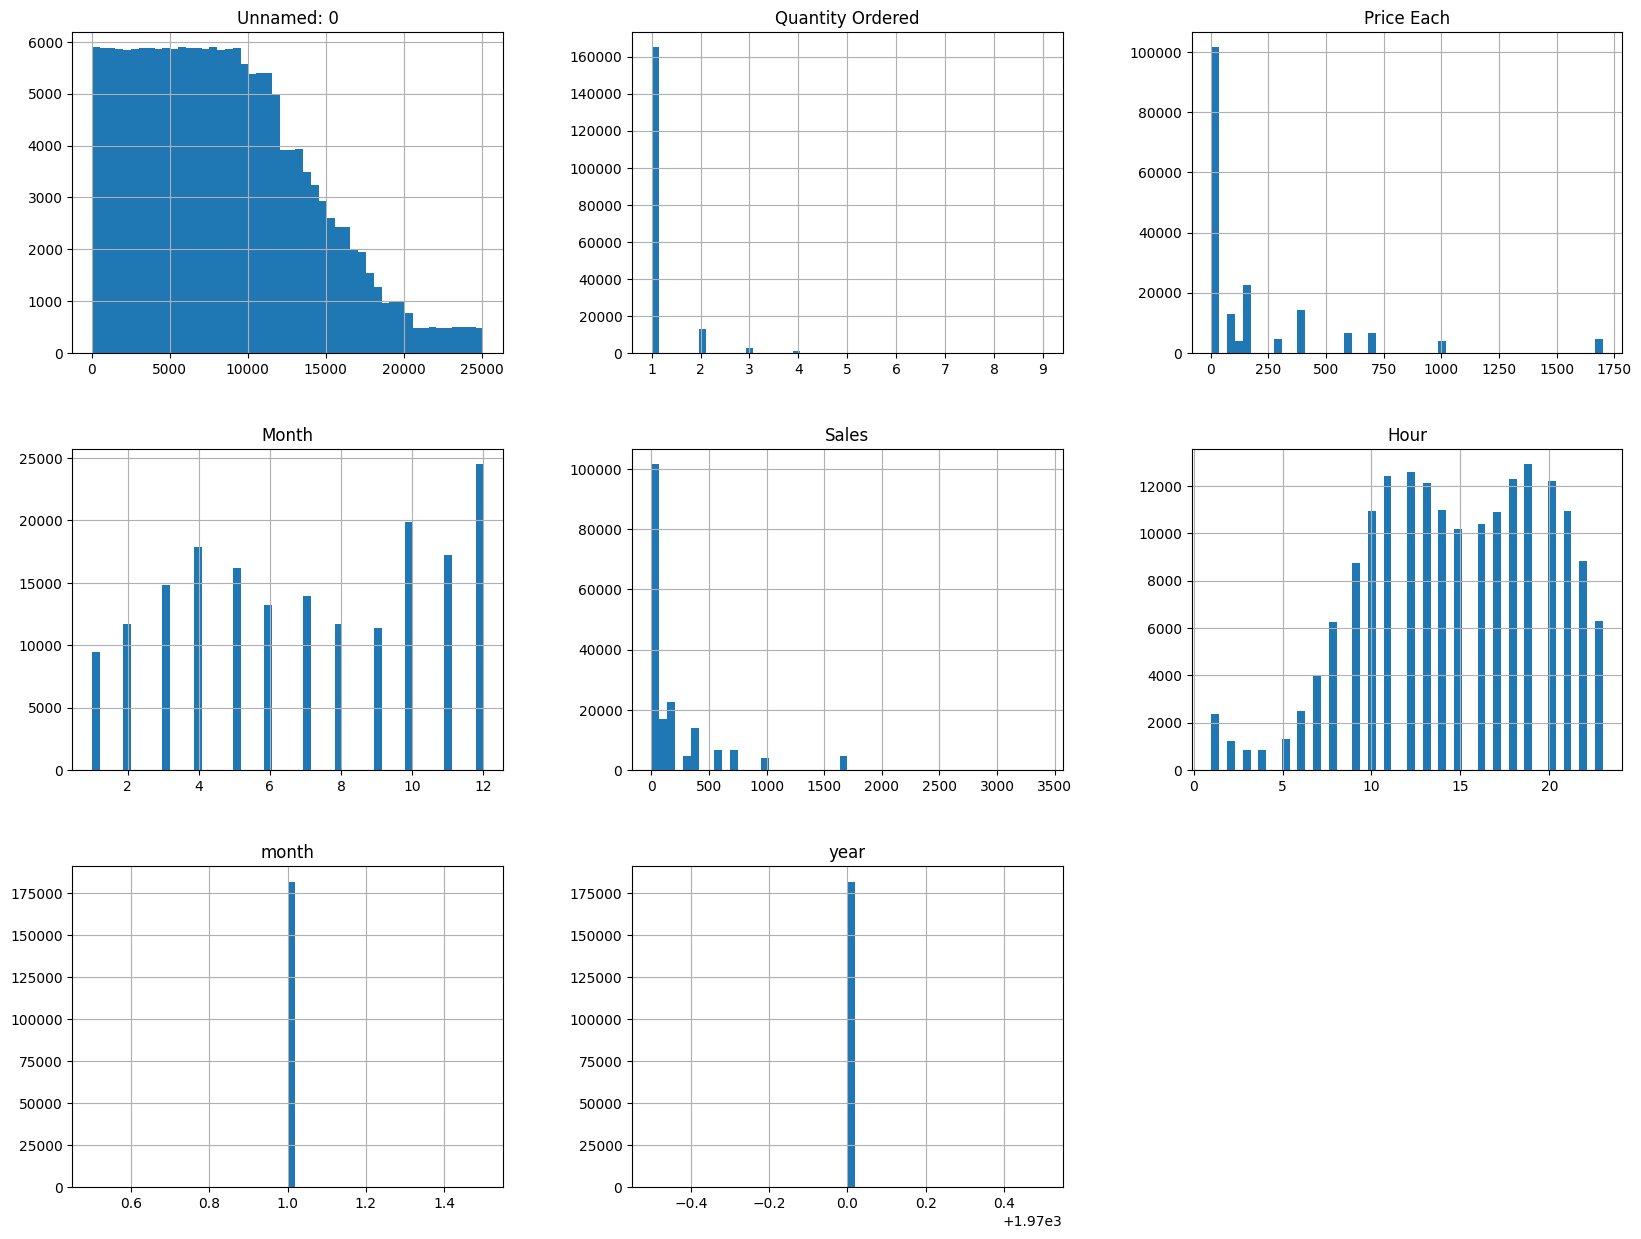

In [16]:
# Analisis Fitur Numerik dengan data fitur tunggal
store.hist(bins=50, figsize=(20,15))
plt.show()

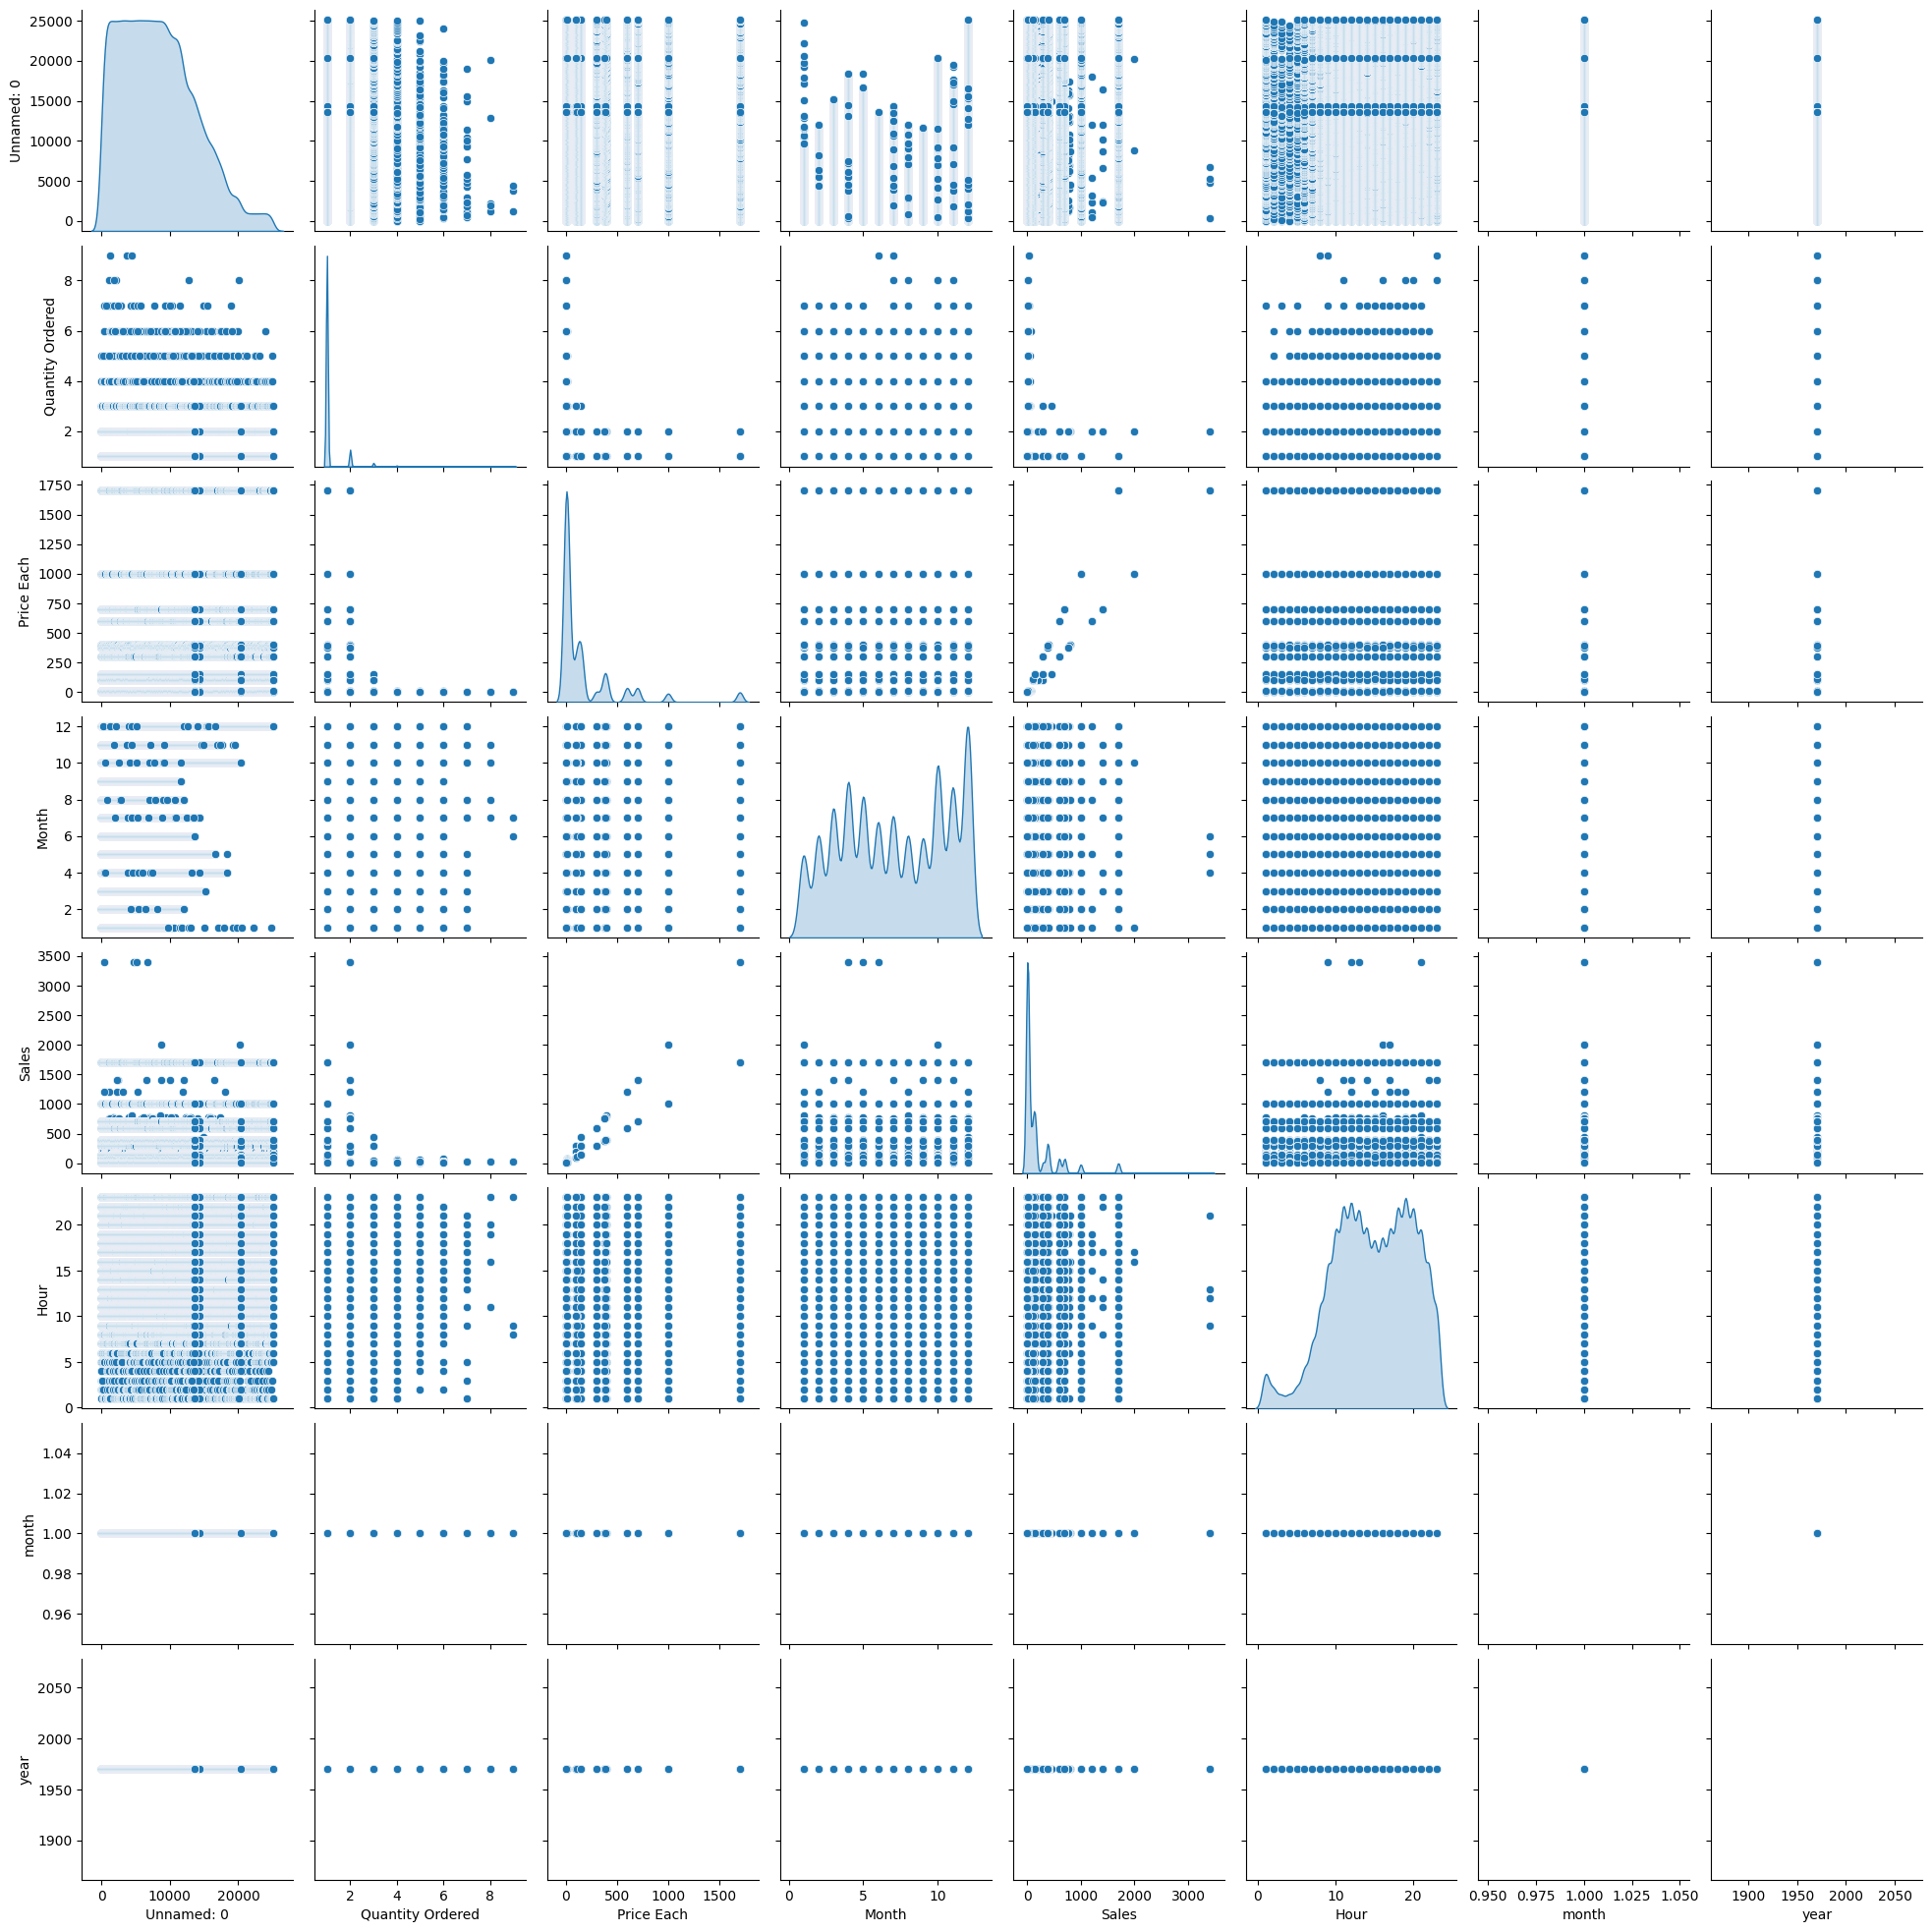

In [17]:
# Mengamati Hubungan Antar Fitur Numerik dengan Fungsi 'pairplot()'
sns.pairplot(store, diag_kind = 'kde')

<ipython-input-18-844a49df66ca>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = store.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

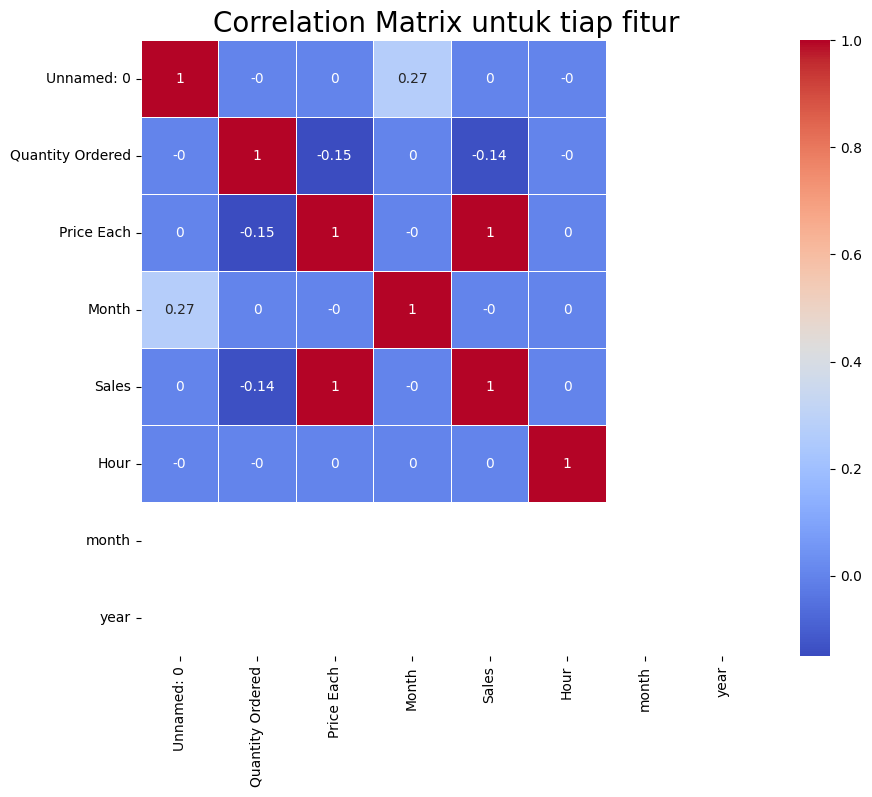

In [18]:
# Evaluasai Skor Korelasi dengan Fungsi 'corr()'
plt.figure(figsize=(10, 8))
correlation_matrix = store.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)